In [20]:
import pandas as pd
import numpy as np

from calc_fx import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# DATA_DIR = config("DATA_DIR")

DATA_DIR = r"../../../FS-project_files/FX-files"

# Initial Pull and analysis

FX_MONTHLY = r"fx_monthly_data.parquet"
FX_DAILY = r"fx_daily_data.parquet"
FX_FORWARD = r"fx_forward_points.parquet"
FX_SPOT_RATES = r"fx_spot_rates.parquet"
FX_INTEREST_RATES = r"fx_interest_rates.parquet"

In [22]:
fx_month = pd.read_parquet(f"{DATA_DIR}/{FX_MONTHLY}")
fx_day = pd.read_parquet(f"{DATA_DIR}/{FX_DAILY}")
fx_forward = pd.read_parquet(f"{DATA_DIR}/{FX_FORWARD}")
fx_spot = pd.read_parquet(f"{DATA_DIR}/{FX_SPOT_RATES}")
fx_interest = pd.read_parquet(f"{DATA_DIR}/{FX_INTEREST_RATES}")

In [25]:
fx_data = prepare_fx_data(fx_spot, fx_forward, fx_interest)

In [36]:
fx_data.tail(60)

,AUD_spot,CAD_spot,CHF_spot,EUR_spot,GBP_spot,JPY_spot,NZD_spot,SEK_spot,AUD_3Mfwd,CAD_3Mfwd,...,SEK_3Mfwd,AUD_ir,CAD_ir,CHF_ir,EUR_ir,GBP_ir,JPY_ir,NZD_ir,SEK_ir,USD_ir
index,,,,,,,,,,,,,,,,,,,,,
2025-03-26,0.6299,1.4267,0.8839,1.0754,1.2888,150.57,0.5729,10.0503,0.630362,1.420317,...,9.994053,4.02580,2.68500,0.17575,NaN,4.37503,0.531395,3.47750,2.2545,4.31312
2025-03-27,0.6305,1.4306,0.8817,1.0801,1.2949,151.05,0.5740,10.0017,0.630955,1.423965,...,9.947648,4.01992,2.66470,0.17425,NaN,4.37730,0.530625,3.47250,2.2486,4.31405
2025-03-28,0.6287,1.4313,0.8808,1.0828,1.2940,149.84,0.5716,10.0130,0.629156,1.424935,...,9.959180,4.02340,2.66300,0.17625,NaN,4.36720,0.529095,3.47255,2.2486,4.29880
2025-03-31,0.6247,1.4388,0.8843,1.0816,1.2918,149.96,0.5678,10.0395,0.625169,1.432299,...,9.985905,4.00520,2.65650,0.17500,NaN,4.36324,0.525955,3.45750,2.2560,4.30070
2025-04-01,0.6278,1.4303,0.8837,1.0793,1.2923,149.61,0.5700,10.0156,0.628264,1.423845,...,9.962142,4.01800,2.64340,0.17500,NaN,4.35875,0.520615,3.45250,2.2620,4.29768
2025-04-02,0.6299,1.4241,0.8818,1.0853,1.3007,149.28,0.5747,9.9133,0.630389,1.417547,...,9.858548,4.01200,2.63650,0.17750,NaN,4.35477,0.520995,3.43750,2.2540,4.29855
2025-04-03,0.6329,1.4097,0.8592,1.1052,1.3100,146.06,0.5794,9.7697,0.633350,1.403198,...,9.718007,3.98360,2.63320,0.15750,NaN,4.33024,0.497965,3.39750,2.2560,4.25627
2025-04-04,0.6040,1.4219,0.8608,1.0956,1.2887,146.93,0.5596,10.0049,0.604445,1.415558,...,9.951815,3.93100,2.59800,0.13500,NaN,4.30600,0.492500,3.37745,2.2238,4.21200
2025-04-07,0.5984,1.4248,0.8593,1.0912,1.2724,147.84,0.5540,10.0656,0.598871,1.418358,...,10.011674,3.89700,2.59850,0.12630,NaN,4.29100,0.485000,3.35000,2.2200,4.21850


In [29]:
ret_list = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NZD', 'SEK', 'USD']

In [69]:
def implied_fx_returns(fx_data, ret_list, bus_day_window=60):
    # use 3 month returns as a default (12 weeks or so)
    # _spot is spot rate
    # _ir is interest rate
    fx_df = fx_data.copy()
    fx_df = fx_df.fillna(method='ffill')
    ret_cols = ['USD_annual_ret']
    for curr_name in ret_list:
        int_col = f"{curr_name}_ir"

        fx_df[f"{int_col}_log"] = np.log(fx_df[int_col] / 100 + 1)
        
        #annualize
        fx_df[f"{int_col}_log_tot"] = fx_df[f"{int_col}_log"].rolling(window=bus_day_window).sum() / 365.25
        
        if curr_name == "USD":
            fx_df["USD_annual_ret"] = fx_df[f"{int_col}_log_tot"] * 365.25 * 100 / bus_day_window

            continue    
        
        spot_col = f"{curr_name}_spot"
        fx_df[f"{spot_col}_log_diff"] = np.log(fx_df[spot_col] / fx_df[spot_col].shift(bus_day_window))
        annual_ret_col = f"{curr_name}_annual_ret"
        fx_df[annual_ret_col] = (fx_df[f"{spot_col}_log_diff"] + fx_df[f"{int_col}_log_tot"]) * 365.25 * 100 / bus_day_window
        ret_cols.append(annual_ret_col)

    return fx_df[ret_cols]
        

        


In [70]:
impl_fx_ret = implied_fx_returns(fx_data, ret_list)

C:\Users\xuv14\AppData\Local\Temp\ipykernel_6964\117797396.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fx_df = fx_df.fillna(method='ffill')


<Axes: xlabel='index'>

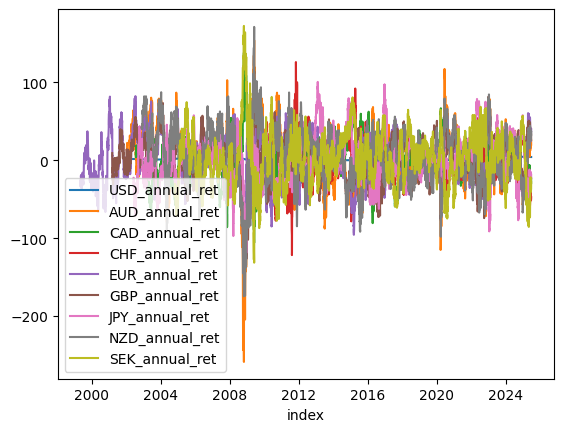

In [73]:
impl_fx_ret.plot()